In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader



In [60]:
data = fetch_california_housing()
X = data.data
y = data.target


In [61]:
#Normalize X and y
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
sc_y = StandardScaler()
y = y.reshape(-1,1)
y = sc_y.fit_transform(y)

In [62]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32) 
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32) 
y_test = torch.tensor(y_test, dtype=torch.float32)

In [64]:
#Defining the class for Linear regression model
class ManualRegression_ANN(nn.Module):
    def __init__(self, input_features, h_layer1, h_layer2, h_layer3, h_layer4):
        super(ManualRegression_ANN, self).__init__()
        self.w1 = torch.nn.Parameter(torch.randn(input_features, h_layer1, requires_grad=True))
        self.b1 = torch.nn.Parameter(torch.zeros(h_layer1, requires_grad=True))
        self.w2 = torch.nn.Parameter(torch.randn(h_layer1, h_layer2, requires_grad=True))
        self.b2 = torch.nn.Parameter(torch.zeros(h_layer2, requires_grad=True))
        self.w3 = torch.nn.Parameter(torch.randn(h_layer2, h_layer3, requires_grad=True))
        self.b3 = torch.nn.Parameter(torch.zeros(h_layer3, requires_grad=True))
        self.w4 = torch.nn.Parameter(torch.randn(h_layer3, h_layer4, requires_grad=True))
        self.b4 = torch.nn.Parameter(torch.zeros(h_layer4, requires_grad=True))
        self.w5 = torch.nn.Parameter(torch.randn(h_layer4, 1, requires_grad=True))
        self.b5 = torch.nn.Parameter(torch.zeros(1, requires_grad=True))

        
    def forward(self, X):
        y1 = torch.relu(torch.mm(X, self.w1) + self.b1)
        y2 = torch.relu(torch.mm(y1, self.w2) + self.b2)
        y3 = torch.relu(torch.mm(y2, self.w3) + self.b3)
        y4 = torch.relu(torch.mm(y3, self.w4) + self.b4)
        y5 = torch.mm(y4, self.w5) + self.b5
        return y5


In [65]:
#Creating Tensor Dataset
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

In [66]:

def train_loop(model, train_data, batch_size, loss_fn, optimizer):
    """Training loop for one epoch."""
    train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
    model.train()  # Set model to training mode

    total_loss = 0
    for x_batch, y_batch in train_loader:
        # Forward pass
        yhat = model(x_batch)
        loss = loss_fn(yhat, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)  # Average loss for the epoch
    return avg_loss


def validate_loop(model, test_data, batch_size, loss_fn):
    """Validation loop for one epoch."""
    test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)
    model.eval()  # Set model to evaluation mode

    total_loss = 0
    with torch.no_grad():  # Disable gradient computation for validation
        for x_batch, y_batch in test_loader:
            # Forward pass
            yhat = model(x_batch)
            loss = loss_fn(yhat, y_batch)
            total_loss += loss.item()

    avg_loss = total_loss / len(test_loader)  # Average validation loss
    return avg_loss


def train_model(model, train_data, test_data, batch_size, n_epoch, loss_fn, optimizer):
    """Train and validate the model."""
    train_losses = []
    val_losses = []

    for epoch in range(n_epoch):
        # Training phase
        train_loss = train_loop(model, train_data, batch_size, loss_fn, optimizer)

        # Validation phase
        val_loss = validate_loop(model, test_data, batch_size, loss_fn)

        # Store losses
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Print epoch summary
        print(f"Epoch {epoch+1}/{n_epoch}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

    return model, train_losses, val_losses


In [67]:
#Training the model
batch_size = 64
model5 = ManualRegression_ANN(X_train.shape[1], 10, 9,  8, 7)
loss_fn = nn.SmoothL1Loss(beta=1.0, reduction='mean')
optimizer = optim.Adam(model5.parameters(), lr=0.001)
n_epoch = 100
trained_model5, train_losses, val_losses = train_model(model5, train_data, test_data, batch_size, n_epoch, loss_fn, optimizer)

Epoch 1/100, Train Loss: 13.1563, Validation Loss: 2.3237
Epoch 2/100, Train Loss: 1.5561, Validation Loss: 0.8482
Epoch 3/100, Train Loss: 0.8741, Validation Loss: 0.5591
Epoch 4/100, Train Loss: 0.6695, Validation Loss: 0.4433
Epoch 5/100, Train Loss: 0.5727, Validation Loss: 0.3880
Epoch 6/100, Train Loss: 0.5136, Validation Loss: 0.3560
Epoch 7/100, Train Loss: 0.4696, Validation Loss: 0.3329
Epoch 8/100, Train Loss: 0.4134, Validation Loss: 0.3075
Epoch 9/100, Train Loss: 0.3311, Validation Loss: 0.2858
Epoch 10/100, Train Loss: 0.2835, Validation Loss: 0.2685
Epoch 11/100, Train Loss: 0.2694, Validation Loss: 0.2591
Epoch 12/100, Train Loss: 0.2589, Validation Loss: 0.2463
Epoch 13/100, Train Loss: 0.2485, Validation Loss: 0.2382
Epoch 14/100, Train Loss: 0.2390, Validation Loss: 0.2320
Epoch 15/100, Train Loss: 0.2313, Validation Loss: 0.2238
Epoch 16/100, Train Loss: 0.2244, Validation Loss: 0.2167
Epoch 17/100, Train Loss: 0.2169, Validation Loss: 0.2150
Epoch 18/100, Train Lo

In [76]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
test_predictions = trained_model5(X_test)
y_pred = test_predictions.detach().numpy()
y_actual = y_test.numpy()

r2 = r2_score(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)
rmse = mean_squared_error(y_actual, y_pred, squared=False)
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.7181
MAE: 0.3527
RMSE: 0.5267


f:\New folder\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


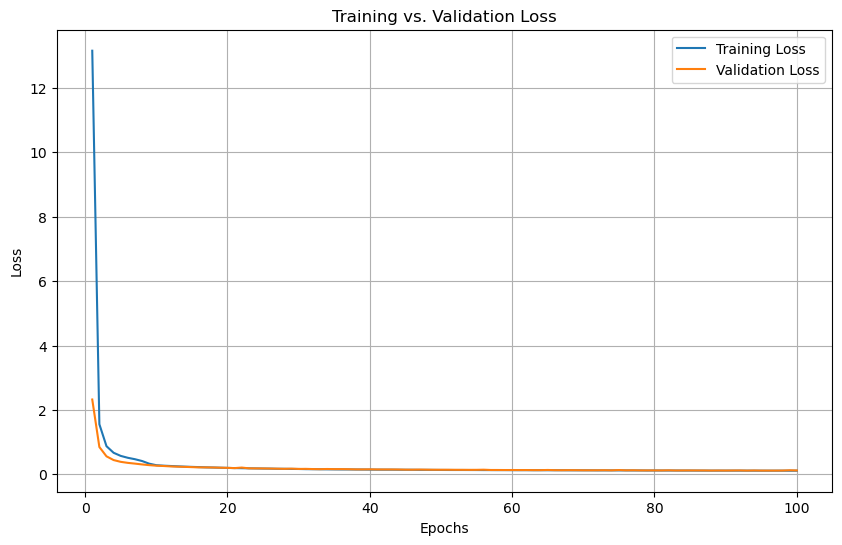

In [71]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_epoch + 1), train_losses, label='Training Loss')
plt.plot(range(1, n_epoch + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid()
plt.show()

